In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import os
import json
import re

# read all json files from different folder

In [3]:
# read real
myList = []
directory = '/Users/moranwang/Desktop/SummerQuarterDS/Capstone/FakeNewsNet/Data/BuzzFeed/FakeNewsContent'
file_names = os.listdir(directory)
cleaned_file_name = [f for f in file_names if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name:   
    with open(os.path.join(directory,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList.append(data)
        
# read fake
myList_real = []
my_df_real  = pd.DataFrame()
directory_real = '/Users/moranwang/Desktop/SummerQuarterDS/Capstone/FakeNewsNet/Data/BuzzFeed/RealNewsContent'
file_names_real = os.listdir(directory_real)
cleaned_file_name_real = [f for f in file_names_real if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_real:   
    with open(os.path.join(directory_real,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_real.append(data)
        
# read fake news
myList_fake = []
my_df  = pd.DataFrame()
directory_fake = '/Users/moranwang/Desktop/SummerQuarterDS/Capstone/FakeNewsNet/Data/PolitiFact/FakeNewsContent'
file_names_fake = os.listdir(directory_fake)
cleaned_file_name_fake = [f for f in file_names_fake if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_fake:   
    with open(os.path.join(directory_fake,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_fake.append(data)
        
# read good news
myList_real_p = []
directory_real_p = '/Users/moranwang/Desktop/SummerQuarterDS/Capstone/FakeNewsNet/Data/PolitiFact/RealNewsContent'
file_names_real_p = os.listdir(directory_real_p)
cleaned_file_name_real_p = [f for f in file_names_real_p if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_real_p:   
    with open(os.path.join(directory_real_p,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_real_p.append(data)

# append all file together (fake and real)

In [4]:
news_list = myList + myList_fake + myList_real + myList_real_p

In [5]:
print(len(news_list))

422


# extract news content 

In [6]:

# news_content_all has already delete the stopwards.words
import re 
news_content_all = []
for i in range (0,len(news_list)): # i from 0 to 90
    per_new_text= []
    news_dict = news_list[i]
    news_content = news_dict['text']
    new_content_token = re.sub(r'[^\w]', ' ', news_content).lower().split()
    new_content_token = [ word for word in new_content_token if word not in stopwords.words('english')]
    news_content_all.append(new_content_token)


In [7]:

print(len(news_content_all))
print(len(news_content_all[0]))
print(len(news_content_all[90]))
print("the type of news_content_all is ", type(news_content_all))
print("the type fo news content all [0] is", type(news_content_all[0]))
print(news_content_all[0][0])
# this news_content_all is a list of list 


422
232
160
the type of news_content_all is  <class 'list'>
the type fo news content all [0] is <class 'list'>
people


In [8]:
# make a list of list to a list of string, do we can use in the Tokenizer part
news_content_string = [' '.join(x) for x in news_content_all]

In [9]:
print(type(news_content_string))
print(news_content_string[0])

<class 'list'>
people noticed something odd hillary outfit debate last night lot could discussed last night debate like unfair debate moderator asking questions help hillary main concern right one thing baffled many hillary appear usually stupid coughing self ready answers detailed facts almost bizarre sputter reach glass water odd everyone grandma talking latest question swirling around social media pictures appeared show hillary kind flesh colored device embedded inside ear earpiece wearing something fashionable old ladies twitter may figured answer see certainly first time hillary use device help think could trick light shadows puffy zipper perhaps hillary actually hiding cough prevention machine hideous feminist pantsuit hillary clinton campaign fervently denying wearing earpiece 101 things young adults know sir john hawkins john hawkins book 101 things young adults know filled lessons newly minted adults need order get life gleaned lifetime trial error writing hawkins provides adv

In [10]:
# another way to create news_content all, a list of string

In [11]:
'''
# news_content_all doesn't delete the stopwards words
import re 
news_content_all = []
for i in range (0,len(news_list)): # i from 0 to 90
    per_new_text= []
    news_dict = news_list[i]
    news_content = news_dict['text']
    new_content_token = re.sub(r'[^\w]', ' ', news_content).lower()
    news_content_all.append(new_content_token)
'''

"\n# news_content_all doesn't delete the stopwards words\nimport re \nnews_content_all = []\nfor i in range (0,len(news_list)): # i from 0 to 90\n    per_new_text= []\n    news_dict = news_list[i]\n    news_content = news_dict['text']\n    new_content_token = re.sub(r'[^\\w]', ' ', news_content).lower()\n    news_content_all.append(new_content_token)\n"

In [12]:
'''
print(news_content_all[0])
print(type(news_content_all[0]))
print(type(news_content_all))
'''

'\nprint(news_content_all[0])\nprint(type(news_content_all[0]))\nprint(type(news_content_all))\n'

# count the word frequency in the entire news and save all words we want to keep , delete words that we think is not important

In [13]:
# news_content_string is a list of string, that are used for embedding 
# news_content_all is a list of list 
# make nested list to flat list and then count frequency 
from collections import Counter
import itertools
flatList = list(itertools.chain.from_iterable(news_content_all))
counts = Counter(flatList)


In [14]:
print(type(counts))
print(len(counts))

<class 'collections.Counter'>
15605


In [15]:
count = 0
for key, cnts in list(counts.items()):   
    if cnts > 5:
        count = count + 1
print(count) 

'''
3798 word frequent is greater than 5. 
'''

3798


'\n3798 word frequent is greater than 5. \n'

# create response variable y fake is 1 and real is 0, y is a list

In [16]:
# create a list to hold the response variable fake and real (1 and 0), the first 91 is fake and last 91 is real
fake_y = [1] * (91 + 120)
real_y = [0]* (91+120)
fake_real_label = []
fake_real_label.extend(fake_y)
fake_real_label.extend(real_y)
print(len(fake_real_label))
print(type(fake_real_label))

# one hot encode the output variable
news_Y = np.array (fake_real_label)
print(type(news_Y))

422
<class 'list'>
<class 'numpy.ndarray'>


In [17]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
#docs = train_X
docs = news_content_string

In [19]:
docs[0]

'people noticed something odd hillary outfit debate last night lot could discussed last night debate like unfair debate moderator asking questions help hillary main concern right one thing baffled many hillary appear usually stupid coughing self ready answers detailed facts almost bizarre sputter reach glass water odd everyone grandma talking latest question swirling around social media pictures appeared show hillary kind flesh colored device embedded inside ear earpiece wearing something fashionable old ladies twitter may figured answer see certainly first time hillary use device help think could trick light shadows puffy zipper perhaps hillary actually hiding cough prevention machine hideous feminist pantsuit hillary clinton campaign fervently denying wearing earpiece 101 things young adults know sir john hawkins john hawkins book 101 things young adults know filled lessons newly minted adults need order get life gleaned lifetime trial error writing hawkins provides advice everyone b

In [20]:
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)


In [21]:
news_embbeding  = t.texts_to_sequences(docs)

'''
# 把词转换为编号，词的编号根据词频设定，频率越大，编号越小
'''

'\n# 把词转换为编号，词的编号根据词频设定，频率越大，编号越小\n'

In [22]:
print(type(news_embbeding))
print(len(news_embbeding[0]))
print(type(news_embbeding[0]))
print(news_embbeding[1])

<class 'list'>
232
<class 'list'>
[9, 46, 799, 800, 1956, 24, 332, 801, 294, 336, 6536, 2469, 9074, 801, 294, 284, 608, 1217, 1440, 9, 319, 6537, 89, 1218, 1296, 3803, 802, 6538, 1530, 117, 9075, 19, 742, 15, 1296, 608, 89, 2098, 258, 226, 163, 1219, 1619, 1724, 1006, 85, 3321, 89, 2098, 1837, 34, 3322, 132, 6539, 2272, 55, 801, 1441, 414, 2703, 3804, 4374, 1725, 2703, 514, 608, 589, 2, 258, 1297, 12, 5253, 6540, 2, 415, 2470, 608, 860, 138, 132, 4375, 63, 89, 1366, 415, 1006, 1619, 1724, 85, 3321, 1367, 2471, 30, 47, 6541, 5254, 1726, 3805, 609, 235, 6542, 416, 3806, 354, 61, 142, 169, 15, 826, 71, 210, 71, 210, 440, 354, 61, 142, 169, 15, 644, 764, 740, 898, 169, 74, 115, 20, 82, 858, 622, 566, 567, 672, 210, 741, 645, 141, 441, 247, 899, 900, 568, 608, 63, 24, 2704, 4376, 9076, 6543, 9077, 938, 320, 2705, 569, 699, 2472, 1099, 1440, 24, 164, 1442, 5255, 318, 6544, 6545, 9078, 590, 221, 623, 6542, 608, 452, 202, 28, 93, 453, 117, 742, 117, 1724, 249, 515, 2473, 5256, 180, 47, 167, 80

In [23]:
max_length = 426
padded_docs = pad_sequences(news_embbeding, maxlen=max_length) 


In [24]:
'''
pad_sequences is a function that can make different length of news become same length, if the length of a news exceed 
the maxlen, then this function will make the words that exceed max length to 0 and if the length of a news is less than
the maxlen, then this function will make the different length of words between current length and max length to 0. 

So, how to set the max length? how to determine what element should be left or delete? 

before doing pad_sequences, we decide to count frequency of words in all news then rank them. Save the words with 
highest and useful words. (except I , am , and, my)

Saving the words that we want to keep to a new trainX and redo the new embedding. 


By the way, the embedding part is translate each word to a unqiue integer. 
'''

'\npad_sequences is a function that can make different length of news become same length, if the length of a news exceed \nthe maxlen, then this function will make the words that exceed max length to 0 and if the length of a news is less than\nthe maxlen, then this function will make the different length of words between current length and max length to 0. \n\nSo, how to set the max length? how to determine what element should be left or delete? \n\nbefore doing pad_sequences, we decide to count frequency of words in all news then rank them. Save the words with \nhighest and useful words. (except I , am , and, my)\n\nSaving the words that we want to keep to a new trainX and redo the new embedding. \n\n\nBy the way, the embedding part is translate each word to a unqiue integer. \n'

In [25]:
# check how many words appears more than 5 times, 
count = 0
for key, cnts in list(counts.items()):   
    if cnts > 30:
        count = count + 1
print(count) 

# greater than 20, 1213 words
# greater than 30, 795 words
# greater than 50, 426 words

795


In [26]:
'''
cannot sort it, because after sort the order of words will change 
'''

'\ncannot sort it, because after sort the order of words will change \n'

In [27]:
# pad_sequences process based on rank
# Example to sort the first element
e1 = news_embbeding[0]
print(sorted(e1,key = int))


[2, 3, 3, 3, 5, 5, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 13, 14, 15, 15, 16, 16, 16, 17, 18, 20, 20, 22, 22, 22, 23, 23, 26, 31, 34, 35, 37, 39, 39, 39, 44, 52, 58, 61, 61, 66, 71, 71, 74, 74, 82, 84, 86, 86, 86, 105, 105, 106, 106, 115, 117, 126, 127, 127, 127, 127, 141, 141, 142, 142, 143, 146, 158, 166, 169, 169, 169, 177, 201, 209, 210, 210, 210, 216, 220, 234, 235, 241, 247, 248, 264, 264, 284, 317, 318, 330, 331, 335, 354, 354, 384, 396, 405, 440, 441, 451, 462, 463, 464, 464, 484, 495, 513, 534, 535, 551, 565, 566, 567, 568, 607, 622, 644, 645, 672, 697, 698, 724, 740, 741, 764, 796, 796, 797, 798, 826, 827, 857, 858, 859, 897, 898, 899, 900, 975, 1005, 1047, 1098, 1157, 1158, 1214, 1214, 1214, 1215, 1216, 1294, 1295, 1365, 1436, 1437, 1437, 1438, 1439, 1721, 1722, 1723, 1834, 1835, 1836, 1836, 1953, 1954, 1955, 2269, 2270, 2271, 2467, 2468, 2468, 2701, 2702, 2970, 2970, 2971, 2972, 2972, 2972, 3317, 3317, 3317, 3317, 3317, 3317, 3318, 3319, 3320, 3799, 3800, 3801, 3802, 4369, 4370, 437

In [28]:
length = [len(x) for x in news_embbeding]
import matplotlib.pyplot as plt
%matplotlib inline



(array([332.,  56.,  18.,  10.,   1.,   2.,   0.,   0.,   1.,   2.]),
 array([   0.,  323.,  646.,  969., 1292., 1615., 1938., 2261., 2584.,
        2907., 3230.]),
 <a list of 10 Patch objects>)

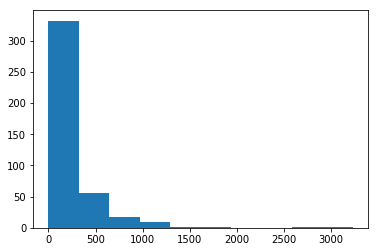

In [29]:
plt.hist(length)

In [30]:
length = sorted(length)
length

index = int(len(length)* 0.97) # 1171 cover 97% of words
max_length = length[index]
print(max_length)

1171


In [31]:

padded_docs = pad_sequences(news_embbeding, maxlen=max_length, padding = 'post') 



# choose save the words which frequent greater than 50?
# padding: String, 'pre' or 'post': pad either before or after each sequence.

In [32]:
print(padded_docs[0:10])

[[   7 2467  105 ...    0    0    0]
 [   9   46  799 ...    0    0    0]
 [2474 2973  552 ...    0    0    0]
 ...
 [2724 2490 1009 ...    0    0    0]
 [2996 6588 1056 ...    0    0    0]
 [   8    3  239 ...    0    0    0]]


In [33]:
len(padded_docs)

422

# use glove to do word embedding

In [34]:
# load the whole embedding into memory
from numpy import array
from numpy import asarray
embeddings_index = dict()
file = "/Users/moranwang/Desktop/SummerQuarterDS/glove/glove.6B.50d.txt"
f = open(file)
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [35]:
'''
Next, we need to create a matrix of one embedding for each word in the training dataset. 
We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight 
vector from the loaded GloVe embedding.
The result is a matrix of weights only for words we will see during training.
'''
vocab_size = len(t.word_index) + 1
from numpy import zeros
embedding_matrix = zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [36]:
print(len(t.word_index)) #  how many words in the entire words
print(type(t.word_index))

15606
<class 'dict'>


In [37]:
#print(t.word_index)

value = [v for key,v in t.word_index.items()]
value.count(1)

1

# using training data to train model

# split training and testing data

In [38]:
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 3
# write your code  to complete following line
train_X, test_X = train_test_split(padded_docs,  test_size=validation_size, random_state=seed)
train_y, test_y = train_test_split(news_Y,  test_size=validation_size, random_state=seed)

In [39]:
print(len(train_X[0]))
print(len(train_X[1]))
print(len(train_X))
print(train_y[0:20])
print(test_X[0:20])

1171
1171
337
[0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0]
[[  977  1241     1 ...     0     0     0]
 [10479  3183    81 ...     0     0     0]
 [  710   188   851 ...     0     0     0]
 ...
 [    4    10     1 ...     0     0     0]
 [  113   467  3823 ...     0     0     0]
 [  404  1038  5598 ...  1693   404  1038]]


# Model

In [55]:
model = Sequential()
# add embedding layers
model.add(Embedding(vocab_size, 50,weights=[embedding_matrix], input_length=max_length)) # length of dictionary, dim output

In [56]:
layer = model.layers[0]
    

In [57]:
layer.trainable = False

In [58]:
model.add(LSTM(40, input_shape =(None,50)))  # what is 20 means?  128 , 256, 512
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'val_accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [59]:
# fit the model
model.fit(train_X, train_y, batch_size=20, validation_data= (test_X, test_y), epochs=50)
# evaluate the model
#loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)

Train on 337 samples, validate on 85 samples
Epoch 1/50
337/337 [==============================] - 15s 44ms/step - loss: 0.6902 - acc: 0.5074 - val_loss: 0.7022 - val_acc: 0.4471
Epoch 2/50
337/337 [==============================] - 14s 41ms/step - loss: 0.6795 - acc: 0.5134 - val_loss: 0.7196 - val_acc: 0.4471
Epoch 3/50
337/337 [==============================] - 14s 41ms/step - loss: 0.6756 - acc: 0.5134 - val_loss: 0.7471 - val_acc: 0.4471
Epoch 4/50
337/337 [==============================] - 14s 41ms/step - loss: 0.6738 - acc: 0.4955 - val_loss: 0.7575 - val_acc: 0.5529
Epoch 5/50
337/337 [==============================] - 14s 41ms/step - loss: 0.6734 - acc: 0.5104 - val_loss: 0.7730 - val_acc: 0.5529
Epoch 6/50
337/337 [==============================] - 14s 41ms/step - loss: 0.6732 - acc: 0.5163 - val_loss: 0.7819 - val_acc: 0.5529
Epoch 7/50
337/337 [==============================] - 14s 41ms/step - loss: 0.6730 - acc: 0.5015 - val_loss: 0.7923 - val_acc: 0.4471
Epoch 8/50
337/33

KeyboardInterrupt: 